In [24]:
from fifipy.calib import readAtran
atran2 = readAtran('BLUE', 2)
atran1 = readAtran('RED', 1)

wtr, atranr, altitudes, wvs = atran1
wtb, atranb, altitudes, wvs = atran2

print(wvs)

[ 1.2         1.3722358   1.56919258  1.79441854  2.05197114  2.34649022
  2.68328157  3.06841254  3.50882129  4.01244183  4.58834695  5.24691163
  6.          6.86117902  7.84596292  8.97209269 10.25985568 11.73245108
 13.41640786 15.34206269 17.54410643 20.06220915 22.94173474 26.23455817
 30.        ]


Blue  [1176000, 1189200, 1246400, 1259600, 1272800]
Red   [647528 660128 672728 685328 697928]


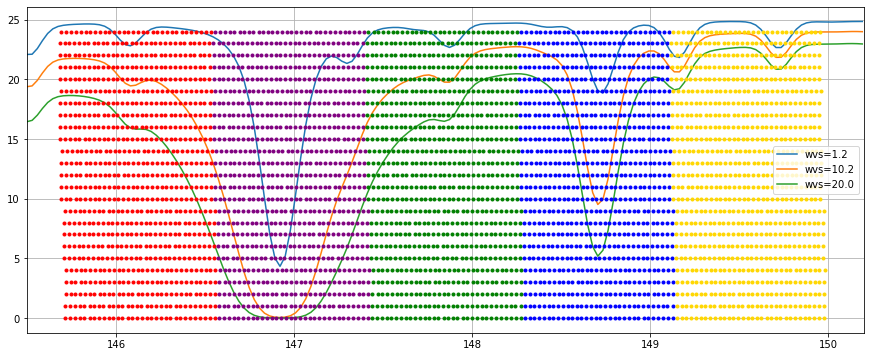

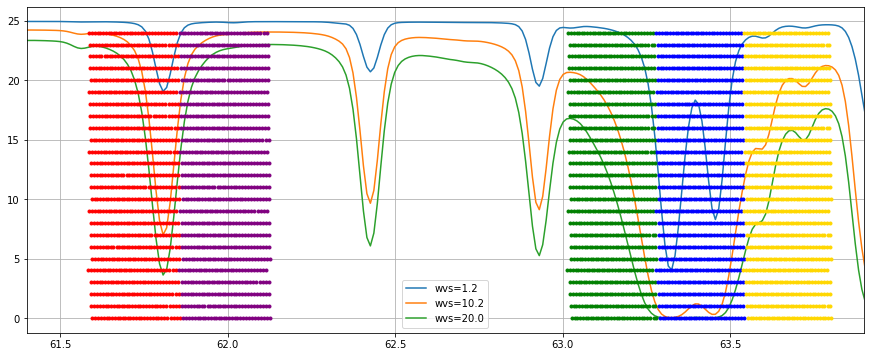

In [38]:
# import matplotlib.pyplot as plt
from obsmaker.grating import inductosyn2wavelength as i2w
import numpy as np

# grating positions
rstep = 420
bstep = 440
blue = [1173100,1185900,1246400,1258700,1272000]
red  = [647528,659208,670888,682568,694248]
red = np.array([0,1,2,3,4])*30*rstep+647528
blue = [1176000, 1176000+30*bstep,1246400, 1246400+30*bstep, 1246400+60*bstep]

print('Blue ', blue)
print('Red  ', red)

colors = ['red','purple','green','blue','gold']

idx = (wtr > 142) & (wtr < 150.2)
fig,ax = plt.subplots(figsize=(15,6))
plt.plot(wtr[idx], atranr[4,0,idx]*25,label='wvs=1.2')
plt.plot(wtr[idx], atranr[4,16,idx]*25,label='wvs=10.2')
plt.plot(wtr[idx], atranr[4,21,idx]*25,label='wvs=20.0')
#plt.axvspan(145.6,148.4, facecolor='g', alpha=0.1)
#obsdate = '2022-03-12T04:41:33'
for gp,col in zip(red,colors):
    l,lw = i2w(gratpos=gp, order=1, array='RED',dichroic=105)
    for n,l_ in enumerate(l[0]):
        ax.plot(l_, np.ones(16)*n, '.',color=col)
    l,lw = i2w(gratpos=gp+rstep, order=1, array='RED',dichroic=105)
    for n,l_ in enumerate(l[0]):
        ax.plot(l_, np.ones(16)*n, '.',color=col)

ax.set_xlim(145.5, 150.2)
#ax.set_xlim(145.5, 147)
plt.legend()
plt.grid()

#idx = (wtb > 62.6) & (wtb < 64.15)
idx = (wtb > 61.0) & (wtb < 65)
fig,ax = plt.subplots(figsize=(15,6))
plt.plot(wtb[idx], atranb[4,0,idx]*25,label='wvs=1.2')
plt.plot(wtb[idx], atranb[4,16,idx]*25,label='wvs=10.2')
plt.plot(wtb[idx], atranb[4,21,idx]*25,label='wvs=20.0')
#plt.axvspan(63,63.76, facecolor='b', alpha=0.1)
#plt.axvspan(61.5,62.2, facecolor='b', alpha=0.1)
#plt.axvspan(61.5,62.2, facecolor='g', alpha=0.1)
#plt.axvspan(62.7,64.15, facecolor='g', alpha=0.1)
ax.set_xlim(61.4,63.9)
#ax.set_xlim(61.4,62.3)

for gp,col in zip(blue,colors):
    l,lw = i2w(gratpos=gp, order=2, array='BLUE',dichroic=105)
    for n,l_ in enumerate(l[0]):
        ax.plot(l_, np.ones(16)*n, '.',color=col)
    l,lw = i2w(gratpos=gp+bstep, order=2, array='BLUE',dichroic=105)
    for n,l_ in enumerate(l[0]):
        ax.plot(l_, np.ones(16)*n, '.',color=col)
    
plt.legend()
plt.grid()